                   hour  count
1   2023-11-01 23:00:00    276
2   2023-11-02 00:00:00    779
3   2023-11-02 01:00:00   1079
4   2023-11-02 02:00:00   1025
5   2023-11-02 03:00:00    928
..                  ...    ...
409 2023-11-30 19:00:00    305
410 2023-11-30 20:00:00    390
411 2023-11-30 21:00:00    321
412 2023-11-30 22:00:00    341
413 2023-11-30 23:00:00    285

[413 rows x 2 columns]
286028


<Figure size 1200x800 with 0 Axes>

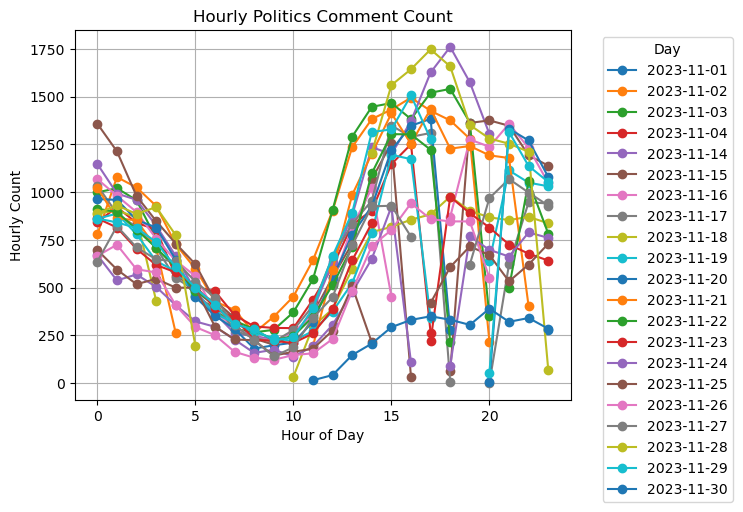

In [1]:
import datetime as dt
from datetime import datetime, timedelta
import json
import pandas as pd
import pymongo
from pymongo import MongoClient
from pandas.io.json import json_normalize
import math
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt


with open('config.json', 'r') as file:
    config_data = json.load(file)

mongo_hostname = config_data['MONGO_HOSTNAME']
mongo_portnumber = config_data['MONGO_PORTNUMBER']


mongo_client = pymongo.MongoClient(mongo_hostname, mongo_portnumber)
db = mongo_client['movieData']

politics_collection = db['politics_comments']


data = politics_collection.find({'reddit_date': {'$exists': True}})



df = pd.DataFrame(data)

df['reddit_date'] = pd.to_datetime(df['reddit_date'])
df['hour'] = df['reddit_date'].dt.floor('H')
grouped_df = df.groupby('hour').size().reset_index(name='count')
grouped_df =  grouped_df[grouped_df['hour'].dt.year != 1970]
grouped_df = grouped_df[grouped_df['hour'].dt.month != 12]

print(grouped_df)

total_count = grouped_df['count'].sum()
print(total_count)


grouped_df['hour'] = pd.to_datetime(grouped_df['hour'])

# Extract day and hour information from the 'hour' column
grouped_df['day'] = grouped_df['hour'].dt.date
grouped_df['hour_of_day'] = grouped_df['hour'].dt.hour

# Group by day and hour, and sum the counts
grouped_df_1 = grouped_df.groupby(['day', 'hour_of_day'])['count'].sum().reset_index()

# Pivot the DataFrame for plotting
pivot_df = grouped_df_1.pivot(index='day', columns='hour_of_day', values='count')

plt.figure(figsize=(12, 8))
pivot_df.T.plot(kind='line', marker='o', linestyle='-')
plt.title('Hourly Politics Comment Count')
plt.xlabel('Hour of Day')
plt.ylabel('Hourly Count')
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()